In [64]:
from liberty.parser import parse_liberty
from pathlib import Path
import re

import matplotlib.pyplot as plt
import numpy as np

In [65]:
pathlist    = Path("./results/multi_cell/results/").rglob('*.lib')

vdds        = []



In [66]:
results = {}

for path in pathlist:
    # because path is object not string
    path_in_str = str(path)

    pattern = r"\dV\d+"

    vdd     = re.search(pattern, path_in_str).group().replace("V",".")

    results[vdd] = {}

    # Read and parse a library.
    library = parse_liberty(open("./" + path_in_str).read())

    for i in range(len(library.get_groups('cell'))):

        cell_rises          = []
        rise_transitions    = []

        cell_falls          = []
        fall_transitions    = []

        try:

            rise_value      = float(str(library.get_groups('cell')[i].get_groups('pin')[1].get_groups('timing')[0].get_groups('cell_rise')[0]['values'][0]).replace('"',''))
            rise_transition = float(str(library.get_groups('cell')[i].get_groups('pin')[1].get_groups('timing')[0].get_groups('rise_transition')[0]['values'][0]).replace('"',''))

            fall_value      = float(str(library.get_groups('cell')[i].get_groups('pin')[1].get_groups('timing')[0].get_groups('cell_fall')[0]['values'][0]).replace('"',''))
            fall_transition = float(str(library.get_groups('cell')[i].get_groups('pin')[1].get_groups('timing')[0].get_groups('fall_transition')[0]['values'][0]).replace('"',''))


        except:

            print(f"No Characterization data for {path_in_str}")

        else:

            #print(vdd, rise_value)

            vdds.append(vdd)

            cell_rises.append(rise_value)
            rise_transitions.append(rise_transition)

            cell_falls.append(fall_value)
            fall_transitions.append(fall_transition)

            results[vdd][library.get_groups('cell')[i].args[0]] = {"cell_rise" : cell_rises[0], "rise_transitions" : rise_transitions[0], "cell_fall" : cell_falls[0], "fall_transitions" : fall_transitions[0]}

Text(0, 0.5, '1.8V Rise time [ns]')

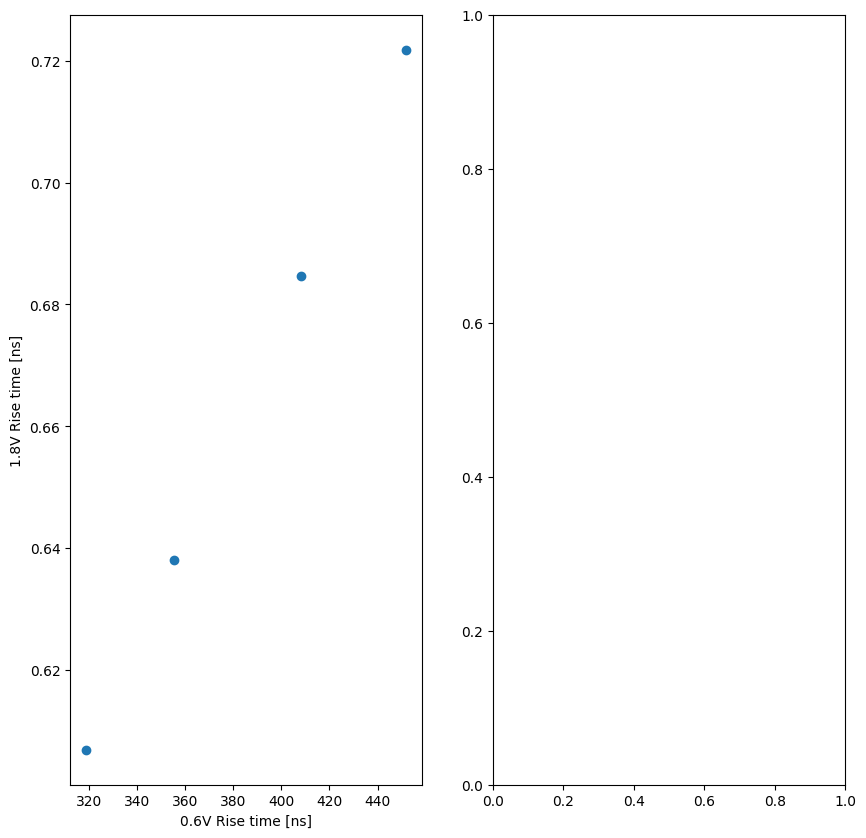

In [67]:
lvvs = []

hvvs = []

cells = list(results['0.6'].keys())

for cell in cells:


    lvvs.append(results['0.6'][cell]['cell_rise'])

    hvvs.append(results['1.8'][cell]['cell_rise'])


plt.rcParams["figure.figsize"] = (10,10)

fig, _axs = plt.subplots(nrows = 1, ncols = 2)

axs = _axs.flatten()

axs[0].scatter(np.array(lvvs, dtype=np.float32), np.array(hvvs, dtype=np.float32), marker='o')
axs[0].set_xlabel("0.6V Rise time [ns]")
axs[0].set_ylabel("1.8V Rise time [ns]")